# RATINGS PREDICTION

### 1.Uploading Data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
trn_data=pd.read_csv('Product_Rating.csv')

In [3]:
trn_data.head()

,Unnamed: 0,Unnamed: 0.1,Product,Brand_name,Price,Rating,Review Summary,Full Review,Review_date
0,0,0,Phone,SAMSUNG Galaxy F13,"₹11,999",3,Fair,"This mobile is purely for normal use, I don't ...",1 month ago
1,1,1,Phone,SAMSUNG Galaxy F13,"₹11,999",4,Nice product,"I am using this Phone since last 7 days , Feel...",18 days ago
2,2,2,Phone,SAMSUNG Galaxy F13,"₹11,999",5,Mind-blowing purchase,🌟Its a great day to day usage phone🌟\nBest bud...,1 month ago
3,3,3,Phone,SAMSUNG Galaxy F13,"₹11,999",5,Terrific purchase,Very good budget branded Phone.\nNot suitable ...,10 days ago
4,4,4,Phone,SAMSUNG Galaxy F13,"₹11,999",5,Mind-blowing purchase,Vale for money 💰,14 days ago


#### Description of attributes:

Product  - name of the product, e.g. phone,Laptop,watch,printer etc

Brand Name - name of the brand, e.g. Apple

Price - Price of the product, e.g. 224.7k

Rating - Rating given by the user, e.g. 5

Review Summary-Review of the product given shortly.

Full_review - Review of the product given by the user, e.g. amazing display and long lasting battery

Review_date - Date at which the review given , e.g. 2-7-2022,8 month ago

In [4]:
#dropping the column Unnamed: 0
trn_data.drop(columns={'Unnamed: 0','Unnamed: 0.1'},inplace=True)

In [5]:
trn_data.shape

(26023, 7)

## 2.Data cleaning

#### 2.1. Checking for duplicates and dropping them

In [6]:
trn_data.duplicated().sum()

4657

In [7]:
#dropping duplicate rows
trn_data.drop_duplicates(inplace=True)

In [8]:
trn_data.duplicated().sum()

0

#### 2.2 checking for missing values

In [9]:
trn_data.isnull().sum()

Product           0
Brand_name        0
Price             0
Rating            0
Review Summary    1
Full Review       0
Review_date       0
dtype: int64

<AxesSubplot:>

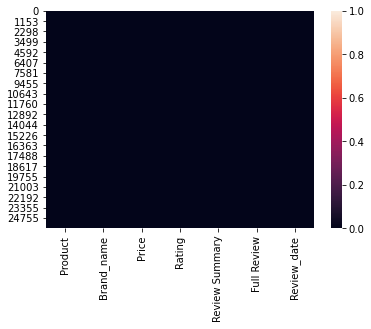

In [10]:
import seaborn as sns
sns.heatmap(trn_data.isnull())

In [11]:
trn_data.dropna(subset=['Review Summary'], inplace = True)

In [12]:
#the complete information about the dataset
trn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21365 entries, 0 to 26012
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product         21365 non-null  object
 1   Brand_name      21365 non-null  object
 2   Price           21365 non-null  object
 3   Rating          21365 non-null  int64 
 4   Review Summary  21365 non-null  object
 5   Full Review     21365 non-null  object
 6   Review_date     21365 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [13]:
trn_data.describe()

,Rating
count,21365.000000
mean,3.958015
std,1.444235
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


### 3.Explanatory Data Analysis

In [14]:
ax =trn_data['Rating'].value_counts().sort_index()
ax

1     3146
2      766
3     1574
4     4232
5    11647
Name: Rating, dtype: int64

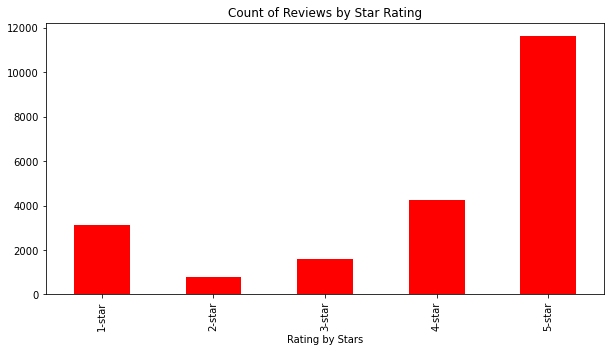

In [15]:
ax = trn_data['Rating'].value_counts().sort_index()\
.plot(kind='bar', 
      title= 'Count of Reviews by Star Rating',  
      figsize = (10,5),
      color = 'Red')
ax.set_xlabel("Rating by Stars")
ax.set_xticklabels(['1-star', '2-star', '3-star', '4-star', '5-star'])
plt.show()

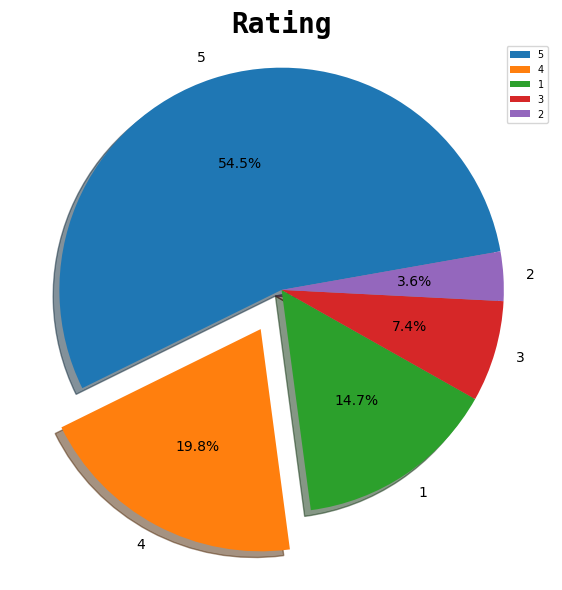

In [16]:
# Creating a pie chart for 'Ratingl status'
Rating = trn_data['Rating'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 7))
plt.pie(Rating.values, labels=Rating.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Rating', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Product')

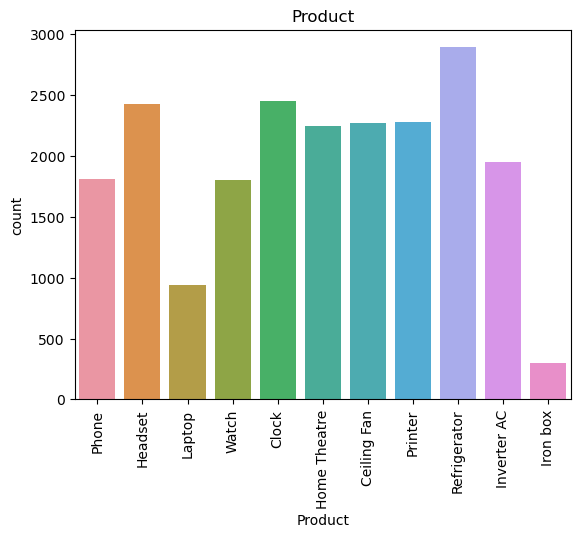

In [17]:
sns.countplot(trn_data['Product'])
plt.xticks(rotation=90)
plt.title('Product')

<Figure size 1000x500 with 0 Axes>

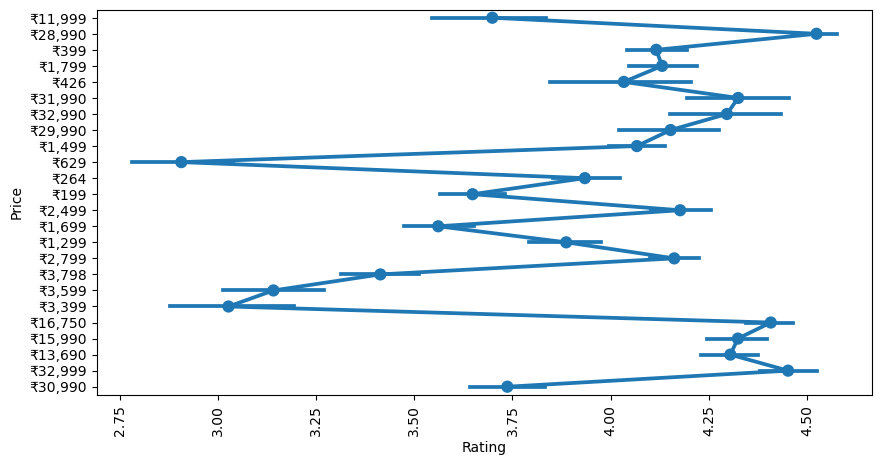

<Figure size 1000x500 with 0 Axes>

In [18]:
plt.figure(figsize=(10,5))

sns.pointplot(trn_data['Rating'],trn_data['Price'])
plt.xticks(rotation=90)
plt.figure(figsize=(10,5))

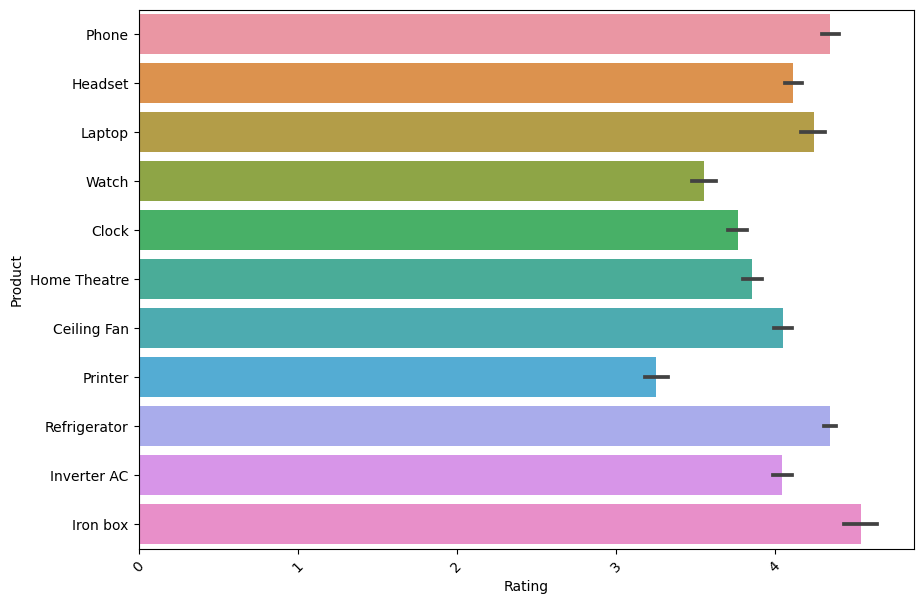

In [19]:
plt.figure(figsize=(10,7))
sns.barplot(x='Rating',y='Product',data=trn_data)
plt.xticks(rotation=45)
plt.show()

In [20]:
#dropping the column Unnamed: 0	
trn_data.drop(columns={'Product','Brand_name','Price','Review_date','Review Summary'},inplace=True)

In [21]:
trn_data.rename(columns={'Full Review':'Review'},inplace=True)

In [22]:
#New column for Length of message
trn_data['Length'] = trn_data.Review.str.len()
trn_data.head(5)

,Rating,Review,Length
0,3,"This mobile is purely for normal use, I don't ...",304
1,4,"I am using this Phone since last 7 days , Feel...",106
2,5,🌟Its a great day to day usage phone🌟\nBest bud...,496
3,5,Very good budget branded Phone.\nNot suitable ...,169
4,5,Vale for money 💰,16


### 4.Data Preprocessing

In [23]:
import re
import nltk
from nltk.corpus import stopwords
import re
import string

In [24]:
import re

def decontracted(phrase):
    # specific
   
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [26]:
stop_words=stopwords.words('english')

In [27]:
lemmatizer=WordNetLemmatizer()

#### 4.1 Full_review

In [28]:
from tqdm import tqdm
preprocessed_texts=[]
#tqdm is for printing the status bar
for sentence in tqdm(trn_data['Review'].values):
    sent=decontracted(sentence)
    sent=re.sub(r'https?:\/\/.*[\r\n]*', '',sent)#remove hyperlink
    sent=re.sub('[^A-Za-z0-9]+', '',sent)#remove special character and number
    sent=re.sub(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress',sent)# Replace URLs with 'webaddress'
    sent=re.sub(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber',sent)# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber
    sent=re.sub(r'\d+(\.\d+)?', 'numbr',sent)# Replace numbers with 'numbr'
    sent=re.sub(r'[?|$|.|!]',r'',sent)
    sent=re.sub(r'[^\w\d\s]', ' ',sent)# Remove punctuation
    sent=' '.join(e for e in sent.split() if e not in stop_words)#removing stop words
    sent=' '.join(lemmatizer.lemmatize(e) for e in sent.split())#Lemmatizer
    preprocessed_texts.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 21365/21365 [00:10<00:00, 1983.72it/s]


In [29]:
trn_data['Review']= preprocessed_texts

In [30]:
trn_data['Review']

0        thismobileispurelyfornormaluseidonotrecommendt...
1        iamusingthisphonesincelastnumbrdaysfeellikever...
2        itsagreatdaytodayusagephonebestbudgetsegmentsm...
3        verygoodbudgetbrandedphonenotsuitableforheavyu...
4                                             valeformoney
                               ...                        
26008    thisironisverygooditheatsupquicklyandglidesony...
26009    timelydeliverynicepackinggooditemwitheasehandl...
26010    ibookedthisproductonthebasisofmyfriendsflipkar...
26011    niceproductblindlywecangoforthisbudgetironwith...
26012    goodatthisrangeandcanbeworthyfordryironitisokb...
Name: Review, Length: 21365, dtype: object

### 4.2 Tokenization

In [31]:
from nltk import word_tokenize
trn_data['Tokenized_Review'] = trn_data['Review'].apply(word_tokenize)
trn_data.Tokenized_Review

0        [thismobileispurelyfornormaluseidonotrecommend...
1        [iamusingthisphonesincelastnumbrdaysfeellikeve...
2        [itsagreatdaytodayusagephonebestbudgetsegments...
3        [verygoodbudgetbrandedphonenotsuitableforheavy...
4                                           [valeformoney]
                               ...                        
26008    [thisironisverygooditheatsupquicklyandglideson...
26009    [timelydeliverynicepackinggooditemwitheasehand...
26010    [ibookedthisproductonthebasisofmyfriendsflipka...
26011    [niceproductblindlywecangoforthisbudgetironwit...
26012    [goodatthisrangeandcanbeworthyfordryironitisok...
Name: Tokenized_Review, Length: 21365, dtype: object

### 4.3 StopWords

In [32]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
print(stopwords)

{'each', 'themselves', 'into', 'be', 'in', 'when', 'after', 'some', "haven't", "mustn't", 'my', 'why', 'than', 'd', 'is', 'we', 'too', 'don', 've', "isn't", 'hasn', 'they', 'over', 'can', 'these', 'while', 'at', 'between', 'other', 'shouldn', 'have', 'more', 'to', 'them', 'that', 'and', 's', 'doing', 'ma', 'having', 'what', 'here', 'whom', "you've", 'those', "didn't", 'all', 'she', 'only', 'theirs', 'about', 'wasn', 'or', 'hadn', 'will', 'until', 'this', 'during', 'where', 'now', "that'll", 'both', "she's", 'her', "won't", 'but', "aren't", 'off', 'been', 'do', 'myself', "wasn't", 'no', 'doesn', 'such', 'it', 'm', 'has', 'a', 'mightn', 'not', 'there', 'herself', 'once', 'as', 'then', 'same', "should've", "needn't", 'if', 'needn', 'does', 'his', 'how', 'your', 'am', "don't", 'y', 're', 'before', 'own', 'weren', 'of', 'yourselves', "you'll", 'by', "it's", "doesn't", "shan't", 'again', 'for', 'yours', 'nor', 'll', 'were', 'above', 'our', 'ours', 'should', 'didn', 'yourself', 'being', 'beca

In [33]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

trn_data['Review'] = trn_data['Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
print(stopwords)

<WordListCorpusReader in 'C:\\Users\\Hi\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>


## 4.4 Stemming

In [34]:
stemmer = nltk.SnowballStemmer('english')

def stemming(text):
    text = [stemmer.stem(word) for word in text]
    text ="".join(text)
    return text

trn_data['Stemmed_Reviews'] = trn_data['Tokenized_Review'].apply(stemming)
trn_data.Stemmed_Reviews

0        thismobileispurelyfornormaluseidonotrecommendt...
1        iamusingthisphonesincelastnumbrdaysfeellikever...
2        itsagreatdaytodayusagephonebestbudgetsegmentsm...
3        verygoodbudgetbrandedphonenotsuitableforheavyu...
4                                             valeformoney
                               ...                        
26008    thisironisverygooditheatsupquicklyandglidesony...
26009    timelydeliverynicepackinggooditemwitheasehandl...
26010    ibookedthisproductonthebasisofmyfriendsflipkar...
26011    niceproductblindlywecangoforthisbudgetironwith...
26012    goodatthisrangeandcanbeworthyfordryironitisokb...
Name: Stemmed_Reviews, Length: 21365, dtype: object

### 4.5 Lemmantizing

In [35]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmantizing(text):
    text = [lemmatizer.lemmatize(word) for word in text]
    text ="".join(text)
    return text

trn_data['Lemmantized_Reviews'] = trn_data['Tokenized_Review'].apply(lemmantizing)
trn_data.Lemmantized_Reviews

0        thismobileispurelyfornormaluseidonotrecommendt...
1        iamusingthisphonesincelastnumbrdaysfeellikever...
2        itsagreatdaytodayusagephonebestbudgetsegmentsm...
3        verygoodbudgetbrandedphonenotsuitableforheavyu...
4                                             valeformoney
                               ...                        
26008    thisironisverygooditheatsupquicklyandglidesony...
26009    timelydeliverynicepackinggooditemwitheasehandl...
26010    ibookedthisproductonthebasisofmyfriendsflipkar...
26011    niceproductblindlywecangoforthisbudgetironwith...
26012    goodatthisrangeandcanbeworthyfordryironitisokb...
Name: Lemmantized_Reviews, Length: 21365, dtype: object

In [36]:
# New column (clean_length) after puncuations,stopwords removal
trn_data['clean_length'] = trn_data.Review.str.len()
trn_data.head()

,Rating,Review,Length,Tokenized_Review,Stemmed_Reviews,Lemmantized_Reviews,clean_length
0,3,thismobileispurelyfornormaluseidonotrecommendt...,304,[thismobileispurelyfornormaluseidonotrecommend...,thismobileispurelyfornormaluseidonotrecommendt...,thismobileispurelyfornormaluseidonotrecommendt...,246
1,4,iamusingthisphonesincelastnumbrdaysfeellikever...,106,[iamusingthisphonesincelastnumbrdaysfeellikeve...,iamusingthisphonesincelastnumbrdaysfeellikever...,iamusingthisphonesincelastnumbrdaysfeellikever...,84
2,5,itsagreatdaytodayusagephonebestbudgetsegmentsm...,496,[itsagreatdaytodayusagephonebestbudgetsegments...,itsagreatdaytodayusagephonebestbudgetsegmentsm...,itsagreatdaytodayusagephonebestbudgetsegmentsm...,396
3,5,verygoodbudgetbrandedphonenotsuitableforheavyu...,169,[verygoodbudgetbrandedphonenotsuitableforheavy...,verygoodbudgetbrandedphonenotsuitableforheavyu...,verygoodbudgetbrandedphonenotsuitableforheavyu...,140
4,5,valeformoney,16,[valeformoney],valeformoney,valeformoney,12


In [37]:
# Total length removal
print ('Origian Length', trn_data.Length.sum())
print ('Clean Length', trn_data.clean_length.sum())

Origian Length 1153077
Clean Length 940434


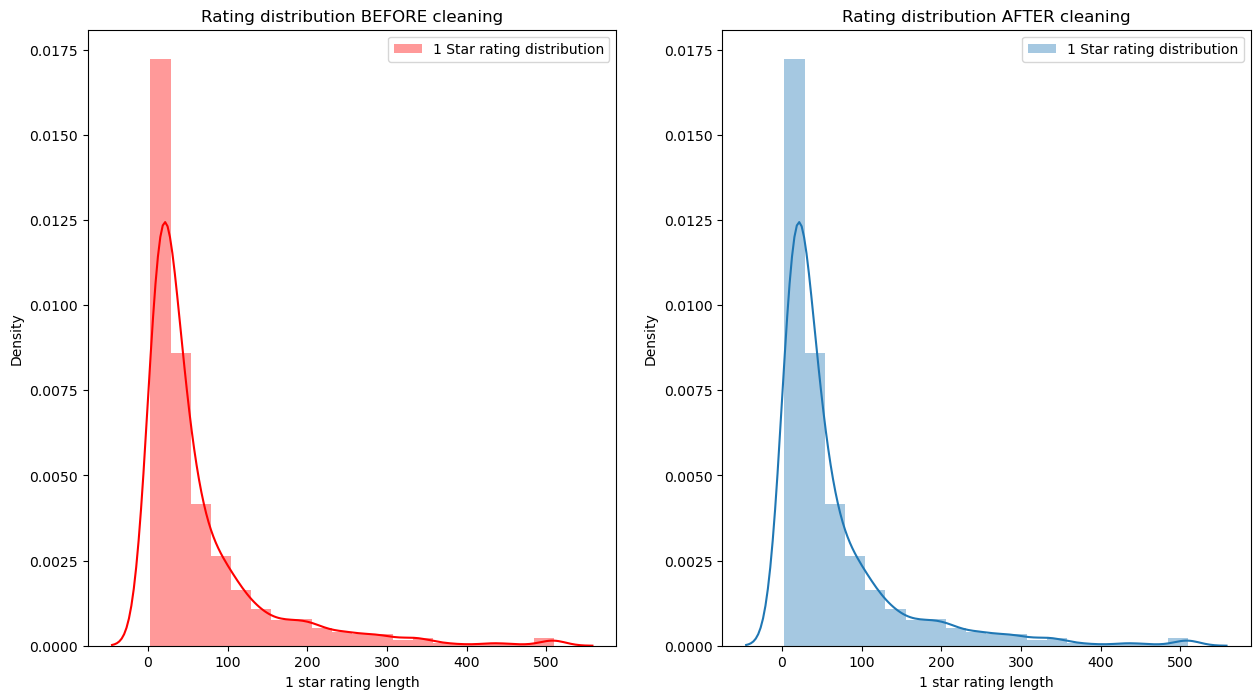

In [38]:
# Rating distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(trn_data[trn_data['Rating']==1]['Length'],bins=20,ax=ax[0],label='1 Star rating distribution',color='r')

ax[0].set_xlabel('1 star rating length')
ax[0].set_title("Rating distribution BEFORE cleaning")
ax[0].legend()

# Rating distribution AFTER cleaning


sns.distplot(trn_data[trn_data['Rating']==1]['Length'],bins=20,ax=ax[1],label='1 Star rating distribution')
ax[1].set_xlabel('1 star rating length')
ax[1].set_title("Rating distribution AFTER cleaning")
ax[1].legend()
plt.show()

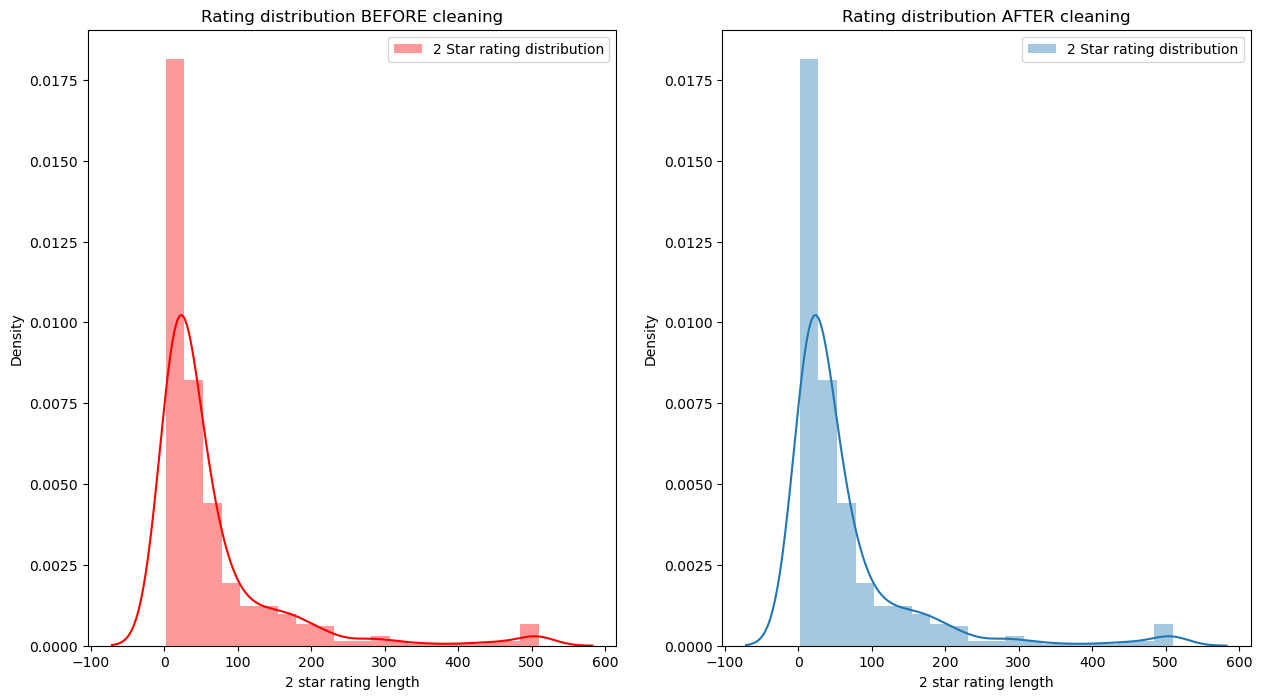

In [39]:
# Rating distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(trn_data[trn_data['Rating']==2]['Length'],bins=20,ax=ax[0],label='2 Star rating distribution',color='r')

ax[0].set_xlabel('2 star rating length')
ax[0].set_title("Rating distribution BEFORE cleaning")
ax[0].legend()

# Rating distribution AFTER cleaning


sns.distplot(trn_data[trn_data['Rating']==2]['Length'],bins=20,ax=ax[1],label='2 Star rating distribution')
ax[1].set_xlabel('2 star rating length')
ax[1].set_title("Rating distribution AFTER cleaning")
ax[1].legend()
plt.show()

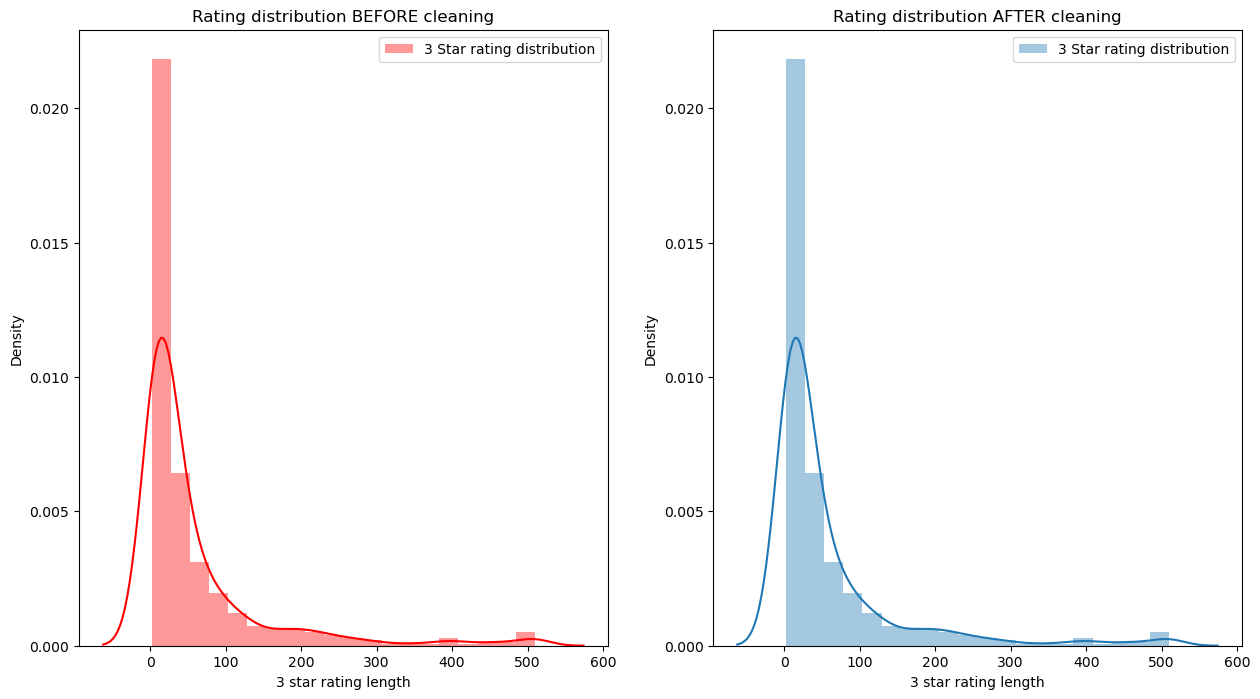

In [40]:
# Rating distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(trn_data[trn_data['Rating']==3]['Length'],bins=20,ax=ax[0],label='3 Star rating distribution',color='r')

ax[0].set_xlabel('3 star rating length')
ax[0].set_title("Rating distribution BEFORE cleaning")
ax[0].legend()

# Rating distribution AFTER cleaning


sns.distplot(trn_data[trn_data['Rating']==3]['Length'],bins=20,ax=ax[1],label='3 Star rating distribution')
ax[1].set_xlabel('3 star rating length')
ax[1].set_title("Rating distribution AFTER cleaning")
ax[1].legend()
plt.show()

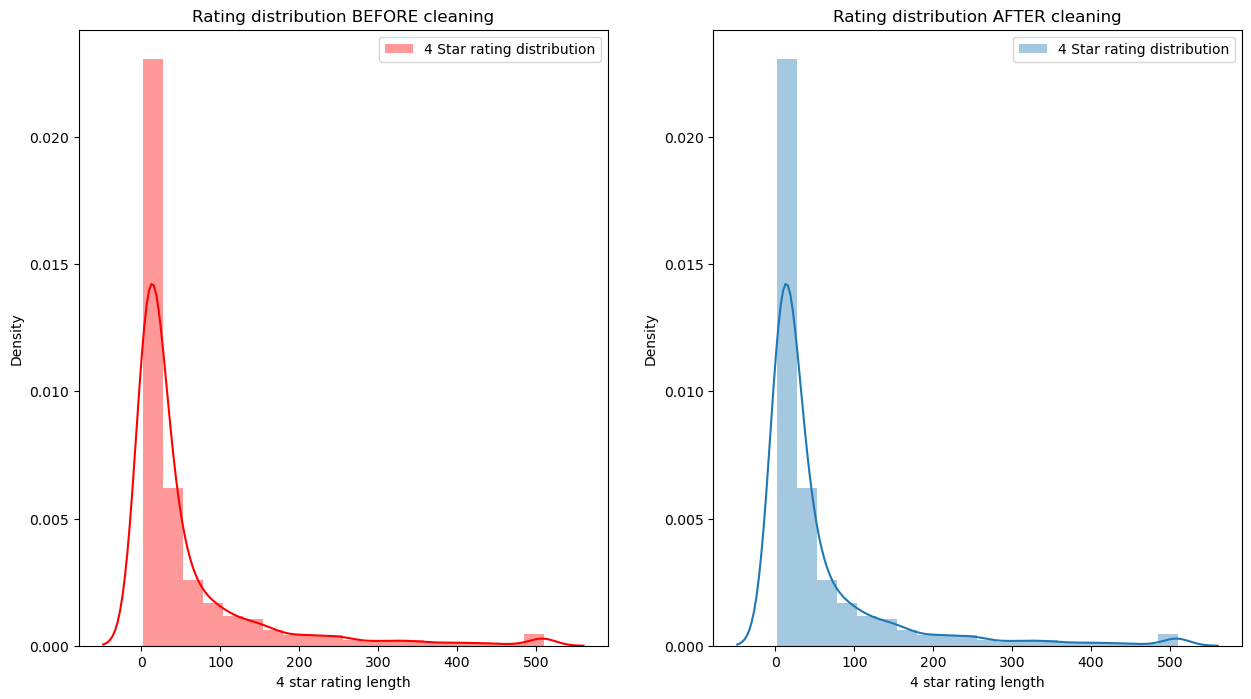

In [41]:
# Rating distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(trn_data[trn_data['Rating']==4]['Length'],bins=20,ax=ax[0],label='4 Star rating distribution',color='r')

ax[0].set_xlabel('4 star rating length')
ax[0].set_title("Rating distribution BEFORE cleaning")
ax[0].legend()

# Rating distribution AFTER cleaning


sns.distplot(trn_data[trn_data['Rating']==4]['Length'],bins=20,ax=ax[1],label='4 Star rating distribution')
ax[1].set_xlabel('4 star rating length')
ax[1].set_title("Rating distribution AFTER cleaning")
ax[1].legend()
plt.show()

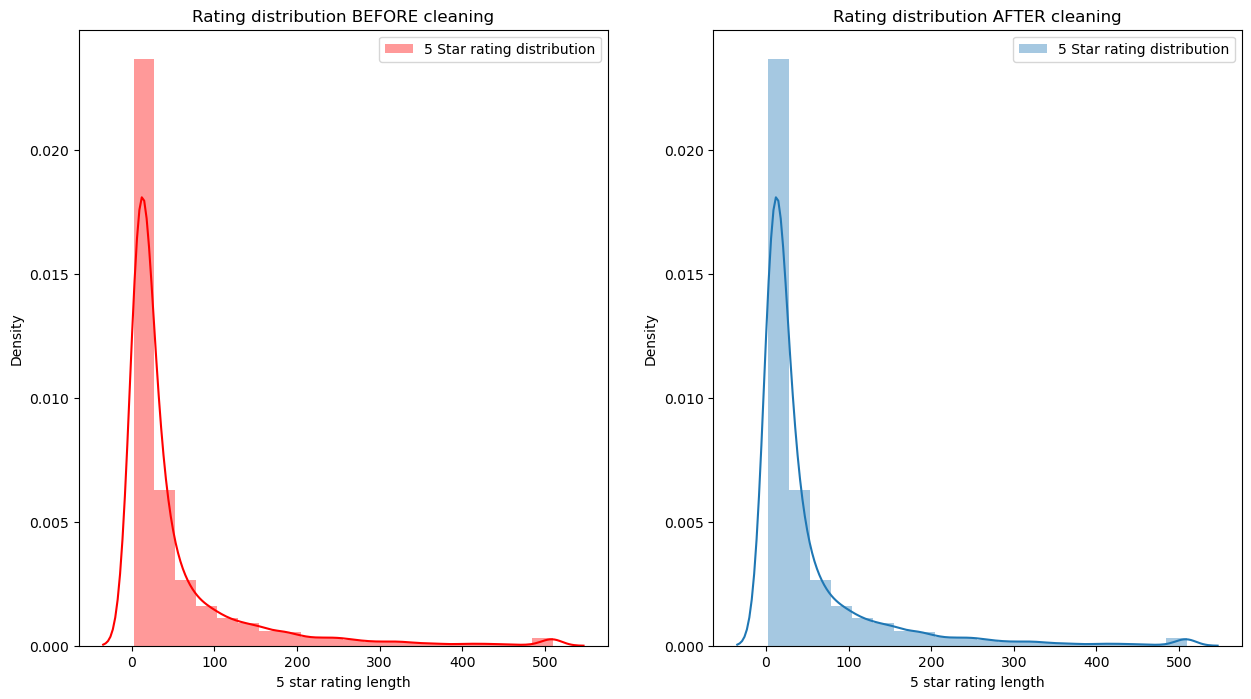

In [42]:
# Rating distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(trn_data[trn_data['Rating']==5]['Length'],bins=20,ax=ax[0],label='5 Star rating distribution',color='r')

ax[0].set_xlabel('5 star rating length')
ax[0].set_title("Rating distribution BEFORE cleaning")
ax[0].legend()

# Rating distribution AFTER cleaning


sns.distplot(trn_data[trn_data['Rating']==5]['Length'],bins=20,ax=ax[1],label='5 Star rating distribution')
ax[1].set_xlabel('5 star rating length')
ax[1].set_title("Rating distribution AFTER cleaning")
ax[1].legend()
plt.show()

# 5. Plotting wordcloud for different ratings

In [43]:
!pip install wordcloud

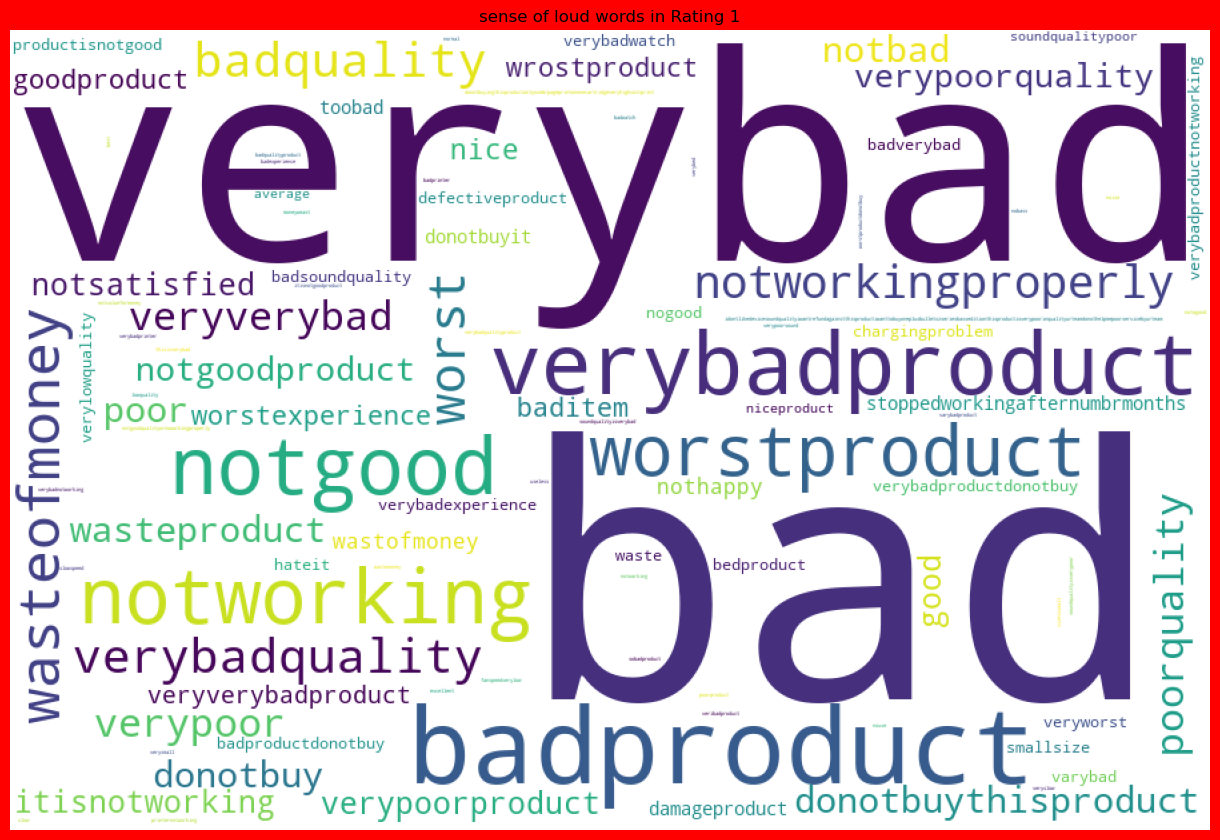

In [44]:
#Getting sense of loud words in Rating 1 
from wordcloud import WordCloud


rating = trn_data['Review'][trn_data['Rating']==1]

rating_cloud = WordCloud(width=900,height=600,background_color='white',max_words=100).generate(' '.join(rating))

plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(rating_cloud)
plt.axis('off')
plt.title('sense of loud words in Rating 1')
plt.tight_layout(pad=0)
plt.show()

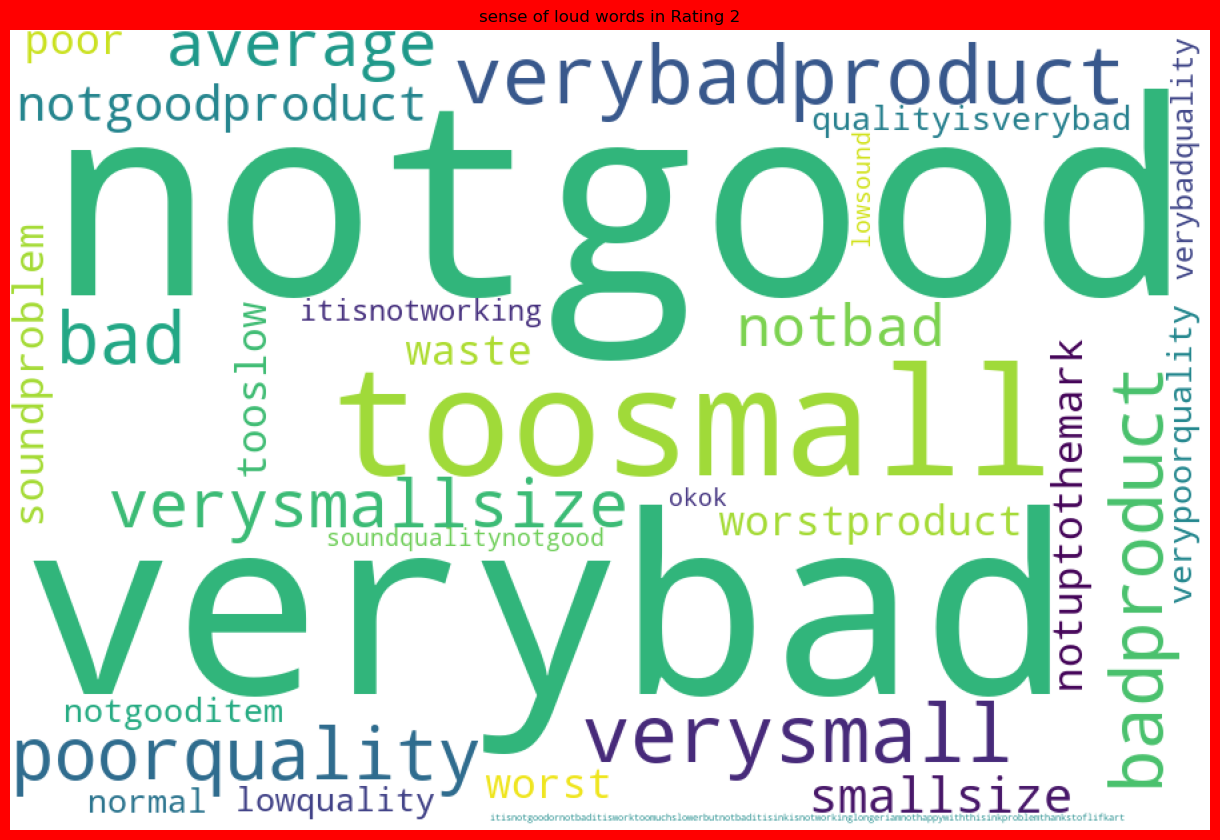

In [45]:
#Getting sense of loud words in Rating 2
from wordcloud import WordCloud


rating = trn_data['Review'][trn_data['Rating']==2]

rating_cloud = WordCloud(width=900,height=600,background_color='white',max_words=100).generate(' '.join(rating))

plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(rating_cloud)
plt.axis('off')
plt.title('sense of loud words in Rating 2')
plt.tight_layout(pad=0)
plt.show()

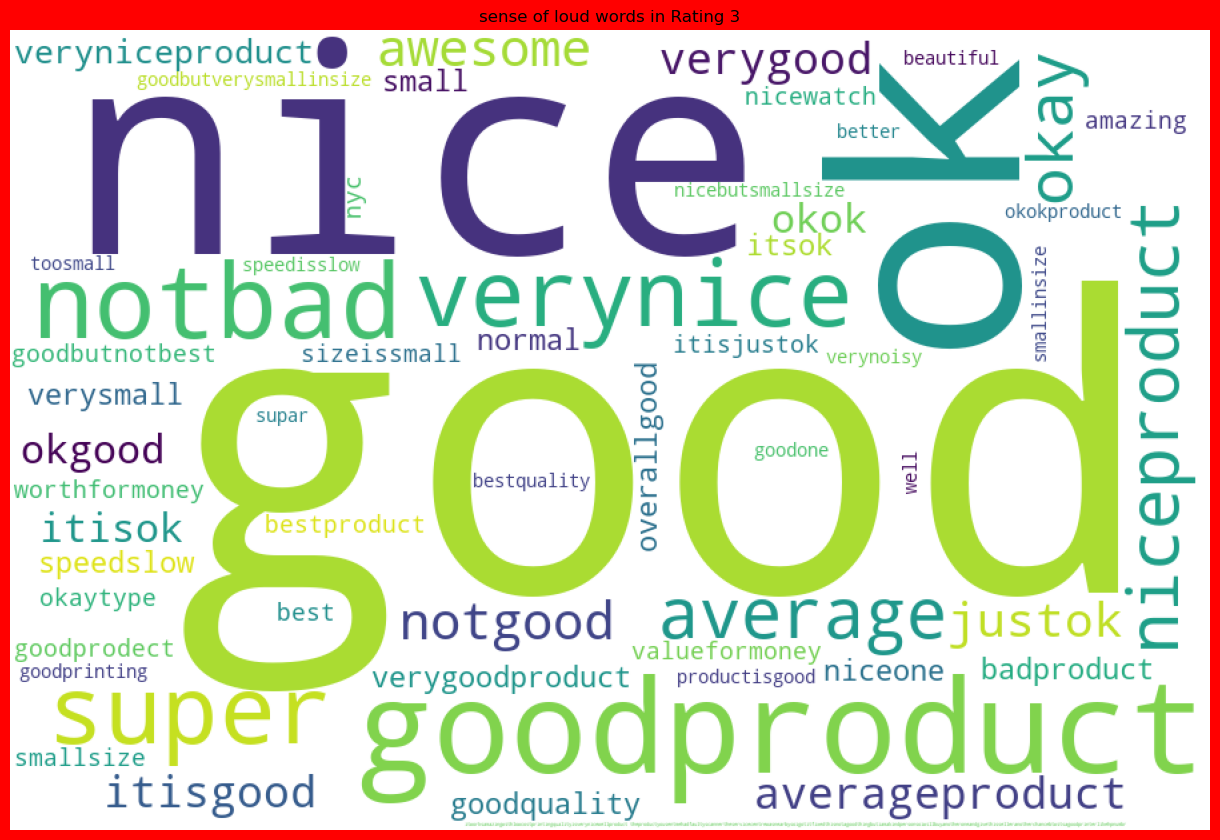

In [46]:
#Getting sense of loud words in Rating 3
from wordcloud import WordCloud


rating = trn_data['Review'][trn_data['Rating']==3]

rating_cloud = WordCloud(width=900,height=600,background_color='white',max_words=100).generate(' '.join(rating))

plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(rating_cloud)
plt.axis('off')
plt.title('sense of loud words in Rating 3')
plt.tight_layout(pad=0)
plt.show()

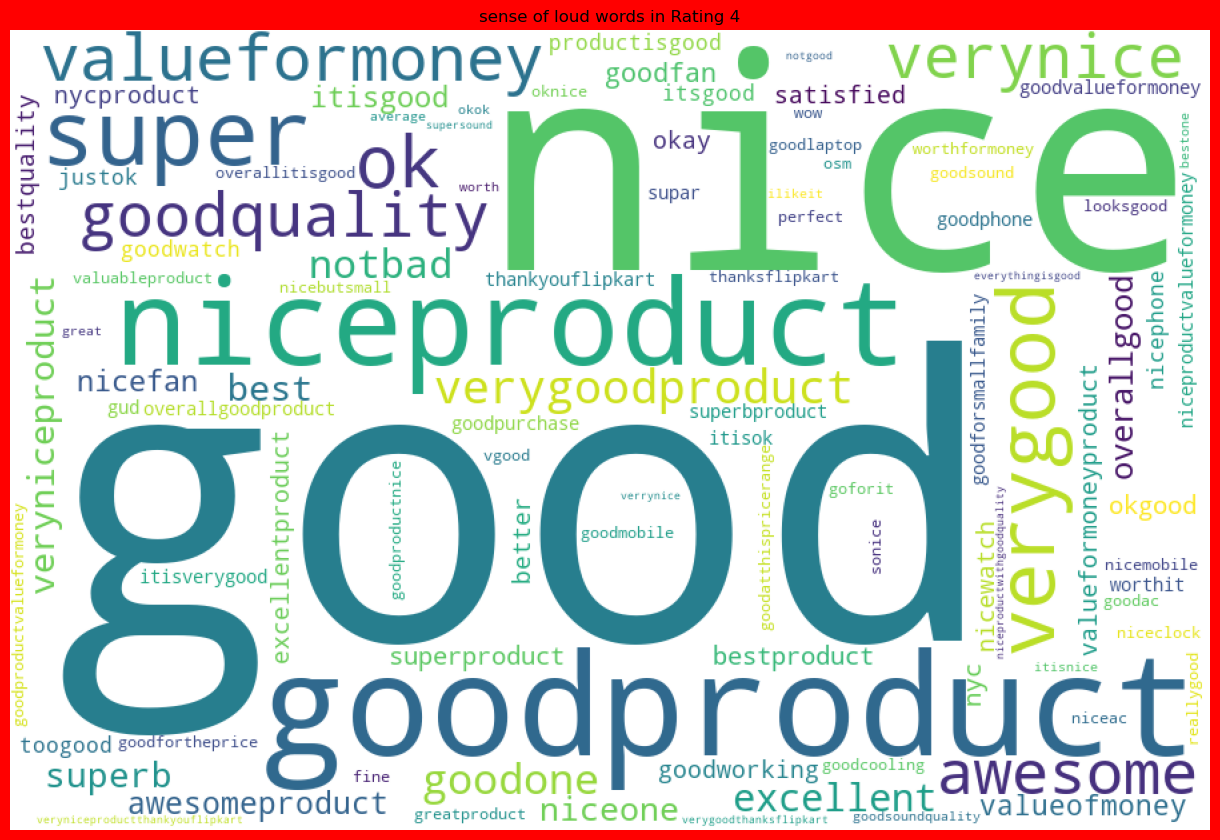

In [47]:
#Getting sense of loud words in Rating 4 
from wordcloud import WordCloud


rating = trn_data['Review'][trn_data['Rating']==4]

rating_cloud = WordCloud(width=900,height=600,background_color='white',max_words=100).generate(' '.join(rating))

plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(rating_cloud)
plt.axis('off')
plt.title('sense of loud words in Rating 4')
plt.tight_layout(pad=0)
plt.show()

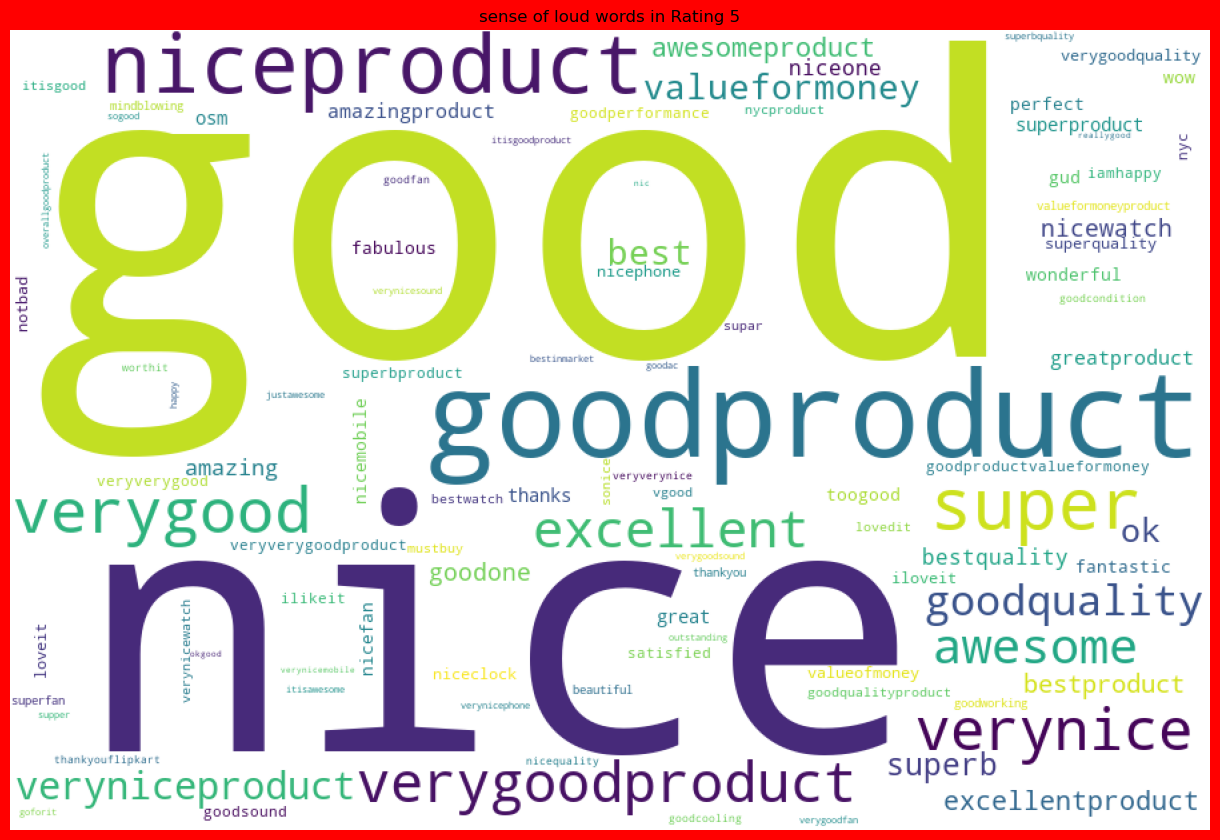

In [48]:
#Getting sense of loud words in Rating 5 
from wordcloud import WordCloud


rating = trn_data['Review'][trn_data['Rating']==5]

rating_cloud = WordCloud(width=900,height=600,background_color='white',max_words=100).generate(' '.join(rating))

plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(rating_cloud)
plt.axis('off')
plt.title('sense of loud words in Rating 5')
plt.tight_layout(pad=0)
plt.show()

# 6. Vectorization to convert text into numeric

### 6.1 Data Encoding

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
# Converting text into numeric using TfidfVectorizer
tf = TfidfVectorizer()
review = tf.fit_transform(trn_data['Review'])
X=review
Y=trn_data['Rating']

In [51]:
X.shape

(21365, 12928)

In [52]:
Y.shape

(21365,)

# 7.Model Building

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics  import mean_squared_error
from sklearn.metrics  import accuracy_score
from sklearn.metrics  import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
import warnings
warnings.filterwarnings('ignore')

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=67, test_size=.3)
print('Training  matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training  matrix size: (14955, 12928)
Training target vector size: (14955,)
Test feature matrix size: (6410, 12928)
Test target vector size: (6410,)


### Finding best Random state

In [55]:

maxAccu=0
maxRS=0
for i in range(50,100):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.5823712948517941 on Random_state 81


## 1.Logistics Regression

In [56]:
# Creating train_test_split using best random_state
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=81, test_size=.3)

In [57]:
from sklearn.linear_model import LogisticRegression
# creating the model
model_lg = LogisticRegression()

# feeding the training set into the model
model_lg.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_lg.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_lg.score(x_train, y_train))
print("Testing accuracy :", model_lg.score(x_test, y_test))
#Accuracy Score
print('Accuracy Score of Logistics Regression :', accuracy_score(y_test, y_pred))
# classification report
print('classification Report of Logistics Regression :\n',classification_report(y_test, y_pred))

# confusion matrix
print('Confusion matrix of Logistics Regression :\n',confusion_matrix(y_test, y_pred))

Training accuracy : 0.5905717151454363
Testing accuracy : 0.5823712948517941
Accuracy Score of Logistics Regression : 0.5823712948517941
classification Report of Logistics Regression :
               precision    recall  f1-score   support

           1       0.83      0.17      0.28       925
           2       0.60      0.01      0.03       225
           3       0.44      0.04      0.08       450
           4       0.32      0.01      0.02      1238
           5       0.58      0.99      0.73      3572

    accuracy                           0.58      6410
   macro avg       0.55      0.25      0.23      6410
weighted avg       0.56      0.58      0.46      6410

Confusion matrix of Logistics Regression :
 [[ 157    0    7    0  761]
 [  22    3    1    1  198]
 [   7    2   20    4  417]
 [   2    0   12   15 1209]
 [   2    0    5   27 3538]]


In [58]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(model_lg, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', model_lg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.56587877 0.57547391 0.57383571 0.57172946 0.56330447]
Mean CV Score : 0.5700444652468992
Std deviation : 0.0046791479287924


# 2.Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model_dt = DecisionTreeClassifier()

# feeding the training set into the model
model_dt.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_dt.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_dt.score(x_train, y_train))
print("Testing accuracy :", model_dt.score(x_test, y_test))

#Accuracy Score
print('Accuracy Score of DecisionTreeClassifier :', accuracy_score(y_test, y_pred))

# classification report
print('classification Report of DecisionTreeClassifier :\n',classification_report(y_test, y_pred))

# confusion matrix
print('Confusion matrix of DecisionTreeClassifier :\n',confusion_matrix(y_test, y_pred))

Training accuracy : 0.8820461384152457
Testing accuracy : 0.5954758190327613
Accuracy Score of DecisionTreeClassifier : 0.5954758190327613
classification Report of DecisionTreeClassifier :
               precision    recall  f1-score   support

           1       0.85      0.26      0.40       925
           2       0.61      0.08      0.13       225
           3       0.42      0.07      0.12       450
           4       0.40      0.06      0.11      1238
           5       0.59      0.97      0.73      3572

    accuracy                           0.60      6410
   macro avg       0.57      0.29      0.30      6410
weighted avg       0.58      0.60      0.50      6410

Confusion matrix of DecisionTreeClassifier :
 [[ 239    8   12    0  666]
 [  25   17    3    1  179]
 [  10    3   33   10  394]
 [   3    0   18   77 1140]
 [   4    0   13  104 3451]]


In [60]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(model_dt, X, Y, cv =5)
print('Cross Validation Score', model_dt, ':\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.56681488 0.57664404 0.57102738 0.60706763 0.59840861]
Mean CV Score : 0.5839925111163117
Std deviation : 0.015858440629869804


# 3.Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model_rfc = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
model_rfc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_rfc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_rfc.score(x_train, y_train))
print("Testing accuracy :", model_rfc.score(x_test, y_test))

#Accuracy Score
print('Accuracy Score of RandomForestClassifier :', accuracy_score(y_test, y_pred))
# classification report
print('classification Report of RandomForestClassifier :\n',classification_report(y_test, y_pred))

# confusion matrix
print('Confusion matrix of RandomForestClassifier :\n',confusion_matrix(y_test, y_pred))

Training accuracy : 0.8820461384152457
Testing accuracy : 0.5981279251170046
Accuracy Score of RandomForestClassifier : 0.5981279251170046
classification Report of RandomForestClassifier :
               precision    recall  f1-score   support

           1       0.86      0.25      0.39       925
           2       0.50      0.08      0.13       225
           3       0.46      0.07      0.12       450
           4       0.45      0.06      0.11      1238
           5       0.59      0.97      0.74      3572

    accuracy                           0.60      6410
   macro avg       0.57      0.29      0.30      6410
weighted avg       0.59      0.60      0.50      6410

Confusion matrix of RandomForestClassifier :
 [[ 233   12   14    0  666]
 [  25   17    3    1  179]
 [   9    4   32    7  398]
 [   2    0   13   74 1149]
 [   3    1    7   83 3478]]


In [ ]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(model_rfc, X, Y, cv =5)
print('Cross Validation Score',model_rfc, ':\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

# 4.Gradient Boosting Classifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

# creating the model
model_gbc = GradientBoostingClassifier()
# feeding the training set into the model
model_gbc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_gbc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_gbc.score(x_train, y_train))
print("Testing accuracy :", model_gbc.score(x_test, y_test))

#Accuracy Score
print('Accuracy Score of GradientBoostingClassifier :', accuracy_score(y_test, y_pred))

# classification report
print('classification Report of GradientBoostingClassifier :\n',classification_report(y_test, y_pred))

# confusion matrix
print('Confusion matrix of GradientBoostingClassifier :\n',confusion_matrix(y_test, y_pred))

Training accuracy : 0.568572383818121
Testing accuracy : 0.5742589703588143
Accuracy Score of GradientBoostingClassifier : 0.5742589703588143
classification Report of GradientBoostingClassifier :
               precision    recall  f1-score   support

           1       0.86      0.12      0.21       925
           2       0.00      0.00      0.00       225
           3       0.50      0.00      0.01       450
           4       0.35      0.01      0.01      1238
           5       0.57      1.00      0.72      3572

    accuracy                           0.57      6410
   macro avg       0.46      0.23      0.19      6410
weighted avg       0.54      0.57      0.44      6410

Confusion matrix of GradientBoostingClassifier :
 [[ 113    0    2    0  810]
 [  16    0    0    0  209]
 [   2    0    2    1  445]
 [   0    0    0    7 1231]
 [   1    0    0   12 3559]]


### 5.SVC

In [65]:
from sklearn.svm import SVC

# creating the model
model_svc = SVC()

# feeding the training set into the model
model_svc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_svc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_svc.score(x_train, y_train))
print("Testing accuracy :", model_svc.score(x_test, y_test))

#Accuracy Score
print('Accuracy Score of SVC :', accuracy_score(y_test, y_pred))

# classification report
print('classification Report of SVC :\n',classification_report(y_test, y_pred))

# confusion matrix
print('Confusion matrix of SVC :\n',confusion_matrix(y_test, y_pred))

Training accuracy : 0.854028752925443
Testing accuracy : 0.5989079563182528
Accuracy Score of SVC : 0.5989079563182528
classification Report of SVC :
               precision    recall  f1-score   support

           1       0.85      0.26      0.40       925
           2       0.56      0.02      0.04       225
           3       0.48      0.07      0.12       450
           4       0.48      0.06      0.10      1238
           5       0.59      0.98      0.74      3572

    accuracy                           0.60      6410
   macro avg       0.59      0.28      0.28      6410
weighted avg       0.60      0.60      0.50      6410

Confusion matrix of SVC :
 [[ 239    2   12    0  672]
 [  25    5    3    1  191]
 [  10    2   32    6  400]
 [   2    0   13   69 1154]
 [   4    0    7   67 3494]]


In [63]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(model_svc, X, Y, cv =5)
print('Cross Validation Score', model_svc, ':\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score SVC() :

CVScore : [0.56821905 0.57758015 0.57383571 0.60379125 0.59840861]
Mean CV Score : 0.5843669553007255
Std deviation : 0.014086829593140657


### 6.KNeighborsClassifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier
# creating model
model_KNc = KNeighborsClassifier(n_neighbors=7)

# feeding the training set into the model
model_KNc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_KNc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_KNc.score(x_train, y_train))
print("Testing accuracy :", model_KNc.score(x_test, y_test))

#Accuracy Score
print('Accuracy Score of LKNeighborsClassifier :', accuracy_score(y_test, y_pred))

# classification report
print('classification Report of KNeighborsClassifier :\n',classification_report(y_test, y_pred))

# confusion matrix
print('Confusion matrix of KNeighborsClassifier :\n',confusion_matrix(y_test, y_pred))

Training accuracy : 0.568505516549649
Testing accuracy : 0.5555382215288611
Accuracy Score of LKNeighborsClassifier : 0.5555382215288611
classification Report of KNeighborsClassifier :
               precision    recall  f1-score   support

           1       0.85      0.17      0.28       925
           2       0.42      0.02      0.04       225
           3       0.30      0.06      0.11       450
           4       0.28      0.11      0.16      1238
           5       0.57      0.91      0.70      3572

    accuracy                           0.56      6410
   macro avg       0.48      0.25      0.26      6410
weighted avg       0.53      0.56      0.47      6410

Confusion matrix of KNeighborsClassifier :
 [[ 154    5    5    2  759]
 [  20    5    1    1  198]
 [   5    2   29   45  369]
 [   2    0   30  135 1071]
 [   1    0   33  300 3238]]


# 8.Hyper Parameter Tuning : GridSearchCV

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
parameter = { 'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [75,100,150]}

In [61]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 1/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.583 total time= 2.2min
[CV 2/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 2/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.574 total time= 2.3min
[CV 3/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 3/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.572 total time= 2.4min
[CV 4/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 4/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.578 total time= 2.4min
[CV 5/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 5/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.575 total time= 2.3min
[CV 1/5; 2/12] STAR

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [75, 100, 150]},
             verbose=10)

In [62]:
GCV.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}

# 9.Final Model

In [65]:
from sklearn.ensemble import RandomForestClassifier

Final_mod = RandomForestClassifier(criterion='gini',n_estimators= 100,max_features='log2')
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('\Final Random Forest Classifier Model')
print('Accuracy Score :'+'\n', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix of Random Forest Classifier :'+' \n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report of Random Forest Classifier'+'\n',classification_report(y_test, y_pred))

\Final Random Forest Classifier Model
Accuracy Score :
 0.597971918876755


Confusion matrix of Random Forest Classifier : 
 [[ 232   12   15    0  666]
 [  25   17    3    1  179]
 [  10    3   33    6  398]
 [   2    0   13   70 1153]
 [   4    0    8   79 3481]]


Classification Report of Random Forest Classifier
               precision    recall  f1-score   support

           1       0.85      0.25      0.39       925
           2       0.53      0.08      0.13       225
           3       0.46      0.07      0.13       450
           4       0.45      0.06      0.10      1238
           5       0.59      0.97      0.74      3572

    accuracy                           0.60      6410
   macro avg       0.58      0.29      0.30      6410
weighted avg       0.59      0.60      0.50      6410



# 10. Saving model

In [66]:
import joblib
joblib.dump(Final_mod,'product_Review_Rating_Prediction.pkl')

['product_Review_Rating_Prediction.pkl']